# Erkan Çetinyamaç

# UYGULAMALI KARAR MODELLERİ

# Vehicle Routing Probleminin Tabu Search ile Çözümünün Uygulaması

# Formulasyon


Çözüm, droneların atanan teslimatların teslimine yönelik vektör grafiğini çizdirmek suretiyle olacaktır. <br>



### Amaç Fonksiyonu

\begin{equation*}
F=min (\sum \limits _{v=1} ^{M} \sum \limits _{i=0} ^{N} \sum \limits _{j=0} ^{N} c_{ij} x_{vij})
\end{equation*}

burada:
<ul>
    <li>$M$ : path sayısı.
    <li>$N$ : alıcı sayısı.
    <li>$c_{ij}$ :  $i$'den  $j$ ' ye giderkenki cost.
    <li>$x_vij$ : $v$ dronunun $i$'den $j$'ye yönlendirilip yönlendirilmediğini belirleyen karar değişkeni. 
    <li>$x_{vij} = \left\{
            \begin{array}{ll}
                1 & \mbox{drone i'den j'ye giderken. }\\
                0 & \mbox{diğer durumlar.}
            \end{array}
        \right. 
        $
</ul>                  

### Kısıtlar
Eğer $ x_{vij} = 1 \Rightarrow  u_{i} + q_{vj} = u_{j}$</br>  bir drone tarafından ziyaret edilen
müşteriye ait dağıtım ve toplamanın aynı araç tarafından yapılması gerektiğini
göstermektedir

<center>$ q_{vi} \leq u_{i} \leq Q \quad \forall_{i} \in_{1, 2,..., N} $</center>

<!-- \begin{equation*}
\sum \limits _{v=1} ^{M} \sum \limits _{i=0} ^{N} y_{iv} \leq Q
\end{equation*}
\begin{equation*}
\sum \limits _{i=0} ^{N} y_{iv} \leq Q \quad }
\end{equation*}
 -->
$ q_{vi} $ –  $i$. müşteriye by $v$. drone tarafından teslim edilen talep miktarı.  

$Q$ – drone kapasitesi.


### Veri Yapıları

> M: Mesafe (Distance) Matrisi

\begin{equation*}
M_{i,j} = 
\begin{pmatrix}
d_{1,1} & d_{1,2} & \cdots & d_{1,n} \\
d_{2,1} & d_{2,2} & \cdots & d_{2,n} \\
\vdots  & \vdots  & \ddots & \vdots  \\
d_{i,1} & d_{i,2} & \cdots & d_{i,j} 
\end{pmatrix}
\end{equation*}

burada:
<ul>
    <li>$i, j$ - Alıcıların İndex Tanımları </li>
    <li>$d_{i,j}$ - Alıcılar Arasındaki Mesafe $i, j$</li>
    <li> öklid mesafesi $d_{i,j} = \sqrt{(x_{i}-x_{j})^{2}+(y_{i}-y_{j})^{2}}$
</ul>

> her bir alacının koordinat listesini

<center>$ L_{i} = a_{1}, a_{2},... a_{i} $</center> temsil eder.





burada:
<ul>
    <li>  $(x_{i}, y_{i})$ $a_{i}$ - $i.$ alıcının koordinatını</li>
</ul>

temsil eder.

In [1]:
from tabu_search import TabuSearch
from visualization import WithVisualization
from matplotlib import pyplot as plt
import numpy as np

<h2>Algoritma Parametrelerinin Testi</h2>

In [2]:
# Sabit değişken ve fonksiyon parametre tanımları.
MAX_COST = 99999
MIN_TABU_SIZE = 50
MAX_TABU_SIZE = 52
TABU_STEP = 1
NUM_OF_TESTS = 3
N_ITERS = 5000
FILE_NAME = "test_data.txt"
NUM_DRONES = 8
DRONE_CAPACITY = 4
NUM_CLIENTS = 30

# Hafıza (Memory) Değişkenlerinin tanımları. Arama boyunca ortaya çıkan durumlar hafıza değişkenlerinde tutulacaktır.
best_of_all = MAX_COST
size = MIN_TABU_SIZE
costs_history = []
best_costs_history = []
fitness_history = []
tabu_size_average_costs = {}
best_model_result = None
best_tabu_size = None


while size <= MAX_TABU_SIZE:
    for _ in range(NUM_OF_TESTS):
        ts = TabuSearch(NUM_DRONES, DRONE_CAPACITY, NUM_CLIENTS, FILE_NAME)
        ts.search(tabu_size=size, n_iters=N_ITERS)
        best_cost = ts._fitness(ts.best_solution)
        print(f'Tabu boyutu: {size}, En iyi cost: {best_cost}')
        fitness_history.append(ts.best_cost)
        best_costs_history.append(ts.best_costs)
        costs_history.append(ts.costs)
        if best_cost < best_of_all:
            best_of_all = best_cost
            best_tabu_size = size
            best_model_result = ts
    hist_arr = np.array(fitness_history)
    tabu_size_average_costs[size] = hist_arr.mean()
    fitness_history = []
    print('=========================')
    print(f'Ortalama: {tabu_size_average_costs[size]}')
    print(f'En iyi: {hist_arr.min()}\n')
    size += TABU_STEP
print(f"En iyi COST: {best_of_all} | Tabu boyutu: {best_tabu_size} | İterasyon sayısı: {N_ITERS}")

Elapsed time 6.526297092437744 s
Tabu boyutu: 50, En iyi cost: 535.4680340793713
Elapsed time 6.397656440734863 s
Tabu boyutu: 50, En iyi cost: 535.4680340793713
Elapsed time 6.649641990661621 s
Tabu boyutu: 50, En iyi cost: 545.2341267116126
Ortalama: 538.7233982901183
En iyi: 535.4680340793713

Elapsed time 7.02626633644104 s
Tabu boyutu: 51, En iyi cost: 535.4680340793713
Elapsed time 6.950408697128296 s
Tabu boyutu: 51, En iyi cost: 540.631188931801
Elapsed time 7.028812408447266 s
Tabu boyutu: 51, En iyi cost: 535.4680340793713
Ortalama: 537.1890856968479
En iyi: 535.4680340793713

Elapsed time 6.9590208530426025 s
Tabu boyutu: 52, En iyi cost: 536.7381320292432
Elapsed time 6.580034971237183 s
Tabu boyutu: 52, En iyi cost: 540.6311889318011
Elapsed time 6.69274640083313 s
Tabu boyutu: 52, En iyi cost: 535.4680340793713
Ortalama: 537.6124516801384
En iyi: 535.4680340793713

En iyi COST: 535.4680340793713 | Tabu boyutu: 50 | İterasyon sayısı: 5000


In [3]:
%matplotlib inline

<h2>Test Sonuçlarının Plotları</h2>

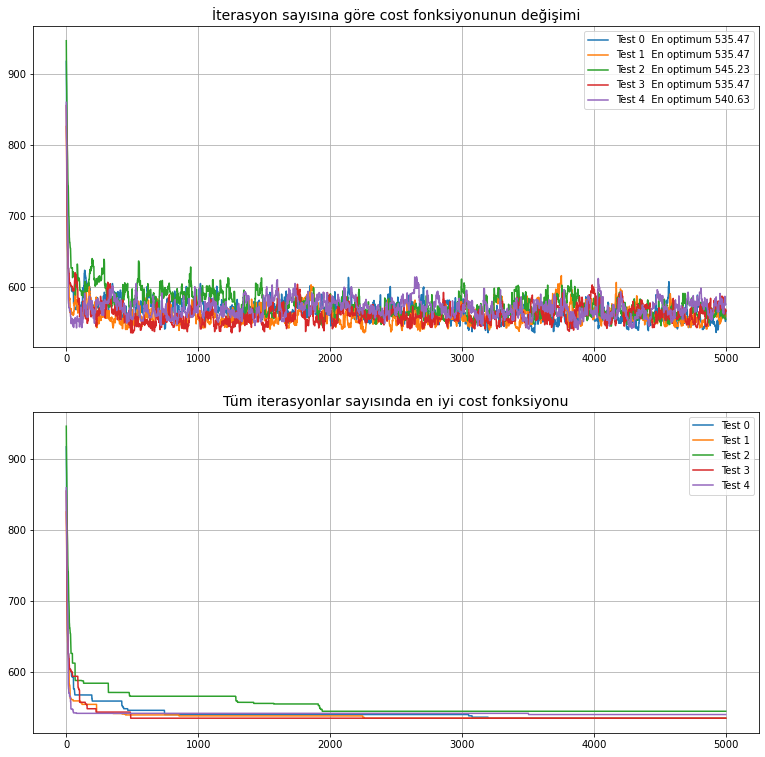

In [4]:
# Her bir test için cost fonksiyonunun hafızasının plotu.


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 13))
for i, (c, b) in enumerate(zip(costs_history[0:5], best_costs_history[0:5])):
    ax1.plot(c[5:], label=f'Test {i}  En optimum {min(b):.2f}')
    ax2.plot(b[5:], label=f'Test {i}')
ax2.legend(), ax1.legend()
ax1.grid(), ax2.grid()
ax1.set_title("İterasyon sayısına göre cost fonksiyonunun değişimi", fontdict={'fontsize': 14})
ax2.set_title("Tüm iterasyonlar sayısında en iyi cost fonksiyonu", fontdict={'fontsize': 14})
plt.show()

<h2>En İyi (Optimum) Sonucun Plotu</h2>

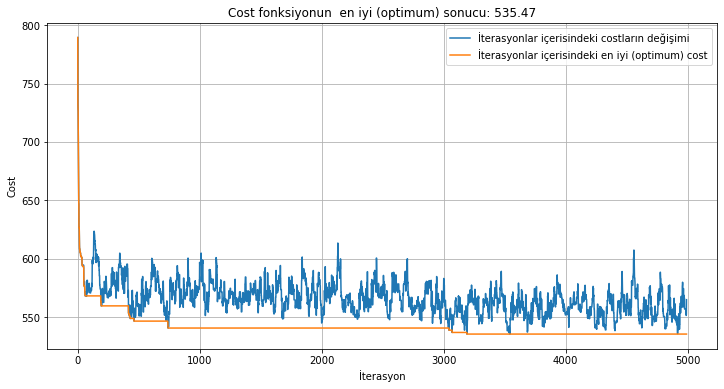

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(best_model_result.costs[10:], label="İterasyonlar içerisindeki costların değişimi")
ax.plot(best_model_result.best_costs[10:], label="İterasyonlar içerisindeki en iyi (optimum) cost")
ax.set_title(f"Cost fonksiyonun  en iyi (optimum) sonucu: {best_of_all:.2f}")
ax.legend()
plt.xlabel('İterasyon')
plt.ylabel('Cost')
plt.grid()
plt.show()

## En İyi (Optimum) Sonucun Görselleştirilmesi

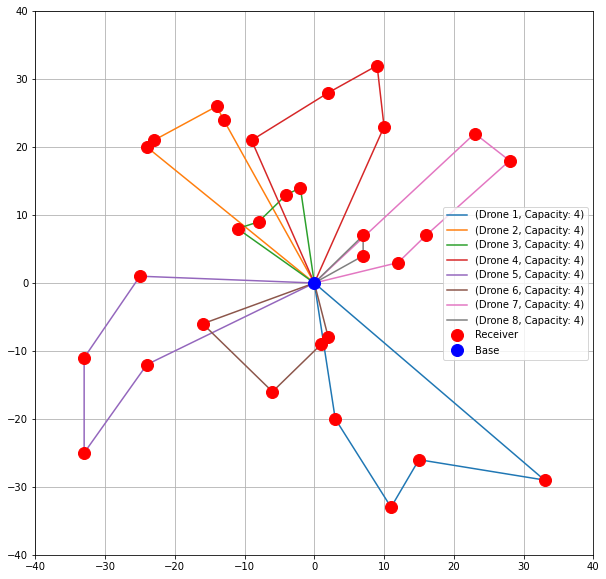

In [6]:
vis = WithVisualization(best_model_result)
vis.plot_figure(sizes=(10, 10))
vis.plot_solution()

In [7]:
%matplotlib qt

## En İyi (Optimum) Sonucun Simülasyon Plotu

In [8]:
logs = open("logs.txt", "w")
logs.close()

vis = WithVisualization(best_model_result)
vis.visualize_solution()

Time: 1 min  (Drone: 1 | Packages: 4) - In base
Time: 1 min  (Drone: 2 | Packages: 4) - In base
Time: 1 min  (Drone: 3 | Packages: 4) - In base
Time: 1 min  (Drone: 4 | Packages: 4) - In base
Time: 1 min  (Drone: 5 | Packages: 4) - In base
Time: 1 min  (Drone: 6 | Packages: 4) - In base
Time: 1 min  (Drone: 7 | Packages: 4) - In base
Time: 1 min  (Drone: 8 | Packages: 4) - In base
Time: 11 min  (Drone: 6 | Packages: 3) - Package delivered to client with id 19
Time: 12 min  (Drone: 8 | Packages: 3) - Package delivered to client with id 16
Time: 14 min  (Drone: 6 | Packages: 2) - Package delivered to client with id 22
Time: 15 min  (Drone: 7 | Packages: 3) - Package delivered to client with id 6
Time: 16 min  (Drone: 3 | Packages: 3) - Package delivered to client with id 3
Time: 16 min  (Drone: 8 | Packages: 2) - Package delivered to client with id 27
Time: 21 min  (Drone: 3 | Packages: 2) - Package delivered to client with id 7
Time: 22 min  (Drone: 7 | Packages: 2) - Package delivered 